In [ ]:
# Given the dataset of customers in a car store, develop models to predict whether or not a customer (Mr Thomas) with details (Male, 33, 74000) will purchase a car.

In [18]:
# IMPORTING RELEVANT LIBRARIES.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# IMPORTING THE DATASET.

data = pd.read_csv('C:\\Users\\hp\\Documents\\Social_Network_Ads.csv')
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [20]:
# DEFINING X AND Y VARIABLES.

x = data.iloc[:, [1,2,3]].values
y = data.iloc[:, 4].values

In [22]:
# ENCODING CATEGORICAL FEATURE, ENCODING DUMMY VARIABLES.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert string variables into numbers.
label = LabelEncoder()
x[:, 0] = label.fit_transform(x[:, 0])

# Convert the numbers into dummies to ensure weights are not assigned to them.
encoder = OneHotEncoder(categorical_features=[0])
x = encoder.fit_transform(x).toarray()

In [25]:
# View the new 'x'.

x

array([[0.0e+00, 1.0e+00, 1.9e+01, 1.9e+04],
       [0.0e+00, 1.0e+00, 3.5e+01, 2.0e+04],
       [1.0e+00, 0.0e+00, 2.6e+01, 4.3e+04],
       ...,
       [1.0e+00, 0.0e+00, 5.0e+01, 2.0e+04],
       [0.0e+00, 1.0e+00, 3.6e+01, 3.3e+04],
       [1.0e+00, 0.0e+00, 4.9e+01, 3.6e+04]])

In [27]:
# SPLITTING DATA INTO TRAINING AND TEST SETS.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [30]:
# FEATURE SCALING.
# Usually applied to algorithms that involve Euclidean distance to bridge the disparity in size between dependent and independent variables.
# fEATURE SCALING IS ALSO IMPORTANT IN THESE ALGORITHMS BECAUSE IT OPTIMIZES RESULTS/OUTPUT.

from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
x_train = scx.fit_transform(x_train)
x_test = scx.transform(x_test)

# We do not scale 'y' because it is binary (non-continous).

In [ ]:
# ALGORITHM 1
# LOGISTIC REGRESSION

In [31]:
# MODEL BUILDING.

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# MODEL PREDICTION.

y_pred = reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [33]:
# MODEL EVALUATION.

from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test,y_pred))
print('Precision:', metrics.precision_score(y_test,y_pred))
print('Recall:', metrics.recall_score(y_test,y_pred))

Accuracy: 0.91
Precision: 0.896551724137931
Recall: 0.8125


In [66]:
# Predicting whether or not Mr Thomas will purchase a car.

y_pred = reg.predict([[0,1,33,74000]])
y_pred

array([1], dtype=int64)

In [ ]:
# The result above (1) suggests that Mr Thomas will make a purchase.
# The Logistic Regression Algorithm therefore suggests at 91% accuracy that Mr Thomas will purchase a car.

In [34]:
# ALGORITHM 2
# KNN

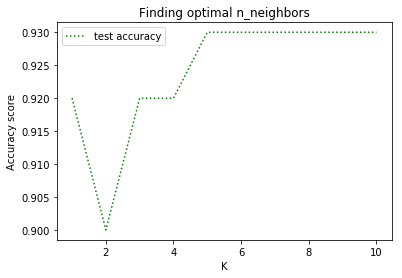

In [39]:
# Finding optimal n_neighbors.

n_rng = range(1,11)
test_accuracy = []

for n in n_rng:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train,y_train)
    test_accuracy.append(knn.score(x_test,y_test))
    
plt.plot(n_rng, test_accuracy, label = 'test accuracy', c = 'g', linestyle = 'dotted')
plt.title('Finding optimal n_neighbors')
plt.xlabel('K')
plt.ylabel('Accuracy score')
plt.legend()

In [ ]:
# The graph shows that choosing n_neighbors between 6 to 10 will yield the highest accuracy.
# We will therefore select n_neighbors to be 8.

In [35]:
# MODEL BUILDING.

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [36]:
# MODEL PREDICTION.

y_pred_k = knn.predict(x_test)
y_pred_k

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [38]:
# MODEL EVALUATION.

print('Accuracy : {:.3f}'.format(metrics.accuracy_score(y_test,y_pred_k)))
print('Precision : {:.3f}'.format(metrics.precision_score(y_test,y_pred_k)))
print('Recall {:.3f}'.format(metrics.recall_score(y_test,y_pred_k)))

Accuracy : 0.930
Precision : 0.879
Recall 0.906


In [67]:
# Predicting for Mr Thomas.

y_pred_k = knn.predict([[0,1,33,74000]])
y_pred_k

array([1], dtype=int64)

In [ ]:
# Knn suggests with a 93% accuracy that Mr Thomas will make a purchase.

In [62]:
# ALGORITHM 3
# SVM

from sklearn.svm import SVC

svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
y_pred_s = svc.predict(x_test)
y_pred_s

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [64]:
print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test,y_pred_s)))
print('Precision: {:.3f}'.format(metrics.precision_score(y_test,y_pred_s)))
print('Recall: {:.3f}'.format(metrics.recall_score(y_test,y_pred_s)))

Accuracy: 0.930
Precision: 0.879
Recall: 0.906


In [69]:
# Predicting Mr Thomas.

y_pred_s = svc.predict([[0,1,33,74000]])
y_pred_s

array([1], dtype=int64)

In [ ]:
# SVC also suggests with a 93% accuracy that Mr Thomas will make a purchase.

In [ ]:
# In conclusion, given the results of the above algorithms and their high accuracies, we are informed to say that Mr Thomas will not be doubting this time as he would purchase a car from the store.

In [ ]:
# We did not apply Naive Bayes, Decision Trees, and Random Forest Algorithms because they do not need feature scaling.